In [1]:
#import dependencies
import pandas as pd

In [2]:
#load data
electionData= pd.read_csv('PresidentElectionsData.csv')

In [3]:
electionData_refined= electionData[['state_fips','state_cen','state_ic','party','candidatevotes','totalvotes']]

In [4]:
electionData_refined = electionData_refined.dropna()

In [5]:
# Removing all other parties than republican , democrat and independant
electionData_refined = electionData_refined.loc[electionData_refined['party'].isin(['democrat','republican','independent'])]

In [6]:
def Labeler(x):
  if(x=='democrat'):
    return 1
  elif(x=='republican'):
    return 2
  elif(x=='independent'):
    return 3


In [7]:
electionData_refined['party'] = electionData_refined['party'].apply(Labeler)

In [8]:
electionData_refined

,state_fips,state_cen,state_ic,party,candidatevotes,totalvotes
0,1,63,41,1,659170,1182850
1,1,63,41,2,504070,1182850
7,2,94,81,2,71555,123574
8,2,94,81,1,44058,123574
11,4,86,61,2,418642,742719
...,...,...,...,...,...,...
3723,55,35,25,2,1405284,2976150
3724,55,35,25,1,1382536,2976150
3732,56,83,68,2,174419,258788
3733,56,83,68,1,55973,258788


In [9]:
X = electionData_refined[['state_fips','party','totalvotes']]
y = electionData_refined[['candidatevotes']]
X.shape
y.shape

(1432, 1)

In [10]:
#train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [11]:
#fitting model - Linear Rergression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Coefficients: 
 [[-3.88919482e+02 -3.66909866e+05  3.94368817e-01]]
Mean squared error: 162255793727.63
Variance score: 0.86


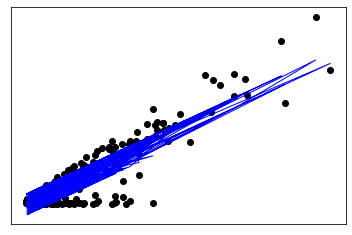

In [17]:
#testing
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
y_pred = reg.predict(X_test)
# The coefficients
print('Coefficients: \n', reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test['totalvotes'], y_test,  color='black')
plt.plot(X_test['totalvotes'],y_pred, color='blue', linewidth=1)
plt.xticks(())
plt.yticks(())

plt.show()

In [18]:
import numpy as np
print("Votes for Democratic",reg.predict(np.array([[1, 1,136000000]]))[0][0])
print("Votes for Republican",reg.predict(np.array([[1, 2,136000000]]))[0][0])

Votes for Democratic 53923911.738670155
Votes for Republican 53557001.872751705


In [19]:
#predicting who has more votes
totalVotes=input("Enter Total Number of Voters in 2020 ")
i = 0
democratWins=0
RepublicanWins=0
while(i<1000):
    if(float(reg.predict(np.array([[i, 1,int(totalVotes)]]))[0][0])<float(reg.predict(np.array([[i, 2,int(totalVotes)]]))[0][0])):
        RepublicanWins+=1
    else:
        democratWins+=1
        i+=1

Enter Total Number of Voters in 2020 13600000


In [20]:
if(RepublicanWins<democratWins):
    print("Democratic Party has more votes")
else:
    print("Republican Party has more votes")


Democratic Party has more votes


# Knowing who has more votes is not really too useful. Because sometimes, less votes wins. Because of electoral college. 

In [1]:
#Something to consider:
#sentiment analysis
import re 
import tweepy 
from tweepy import OAuthHandler 
from textblob import TextBlob 

class TwitterClient(object): 
    ''' 
    Generic Twitter Class for sentiment analysis. 
    '''
    def __init__(self): 
        ''' 
        Class constructor or initialization method. 
        '''
        # keys and tokens from the Twitter Dev Console 
        consumer_key = 'lBnZXzjBSx0K8azuk5OOEIzVL'
        consumer_secret = 'jBbNIfySWrEasa0HMZnN4xhnoXXkyB9AuKxoM7uOD6xuYgNWba'
        access_token = '79908421-EtRrtCanU7HL0tEy1aPF8nVUReWSA7zQjqiNMg0sd'
        access_token_secret = 'pqh5PATdDX1Ug6Jm7IxtiU3Ixrbr2YSDkVuSldVztSgtI'

        # attempt authentication 
        try: 
            # create OAuthHandler object 
            self.auth = OAuthHandler(consumer_key, consumer_secret) 
            # set access token and secret 
            self.auth.set_access_token(access_token, access_token_secret) 
            # create tweepy API object to fetch tweets 
            self.api = tweepy.API(self.auth) 
        except: 
            print("Error: Authentication Failed") 

    def clean_tweet(self, tweet): 
        ''' 
        Utility function to clean tweet text by removing links, special characters 
        using simple regex statements. 
        '''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split()) 

    def get_tweet_sentiment(self, tweet): 
        ''' 
        Utility function to classify sentiment of passed tweet 
        using textblob's sentiment method 
        '''
        # create TextBlob object of passed tweet text 
        analysis = TextBlob(self.clean_tweet(tweet)) 
        # set sentiment 
        if analysis.sentiment.polarity > 0: 
            return 'positive'
        elif analysis.sentiment.polarity == 0: 
            return 'neutral'
        else: 
            return 'negative'

    def get_tweets(self, query, count = 10): 
        ''' 
        Main function to fetch tweets and parse them. 
        '''
        # empty list to store parsed tweets 
        tweets = [] 

        try: 
            # call twitter api to fetch tweets 
            fetched_tweets = self.api.search(q = query, count = count) 

            # parsing tweets one by one 
            for tweet in fetched_tweets: 
                # empty dictionary to store required params of a tweet 
                parsed_tweet = {} 

                # saving text of tweet 
                parsed_tweet['text'] = tweet.text 
                # saving sentiment of tweet 
                parsed_tweet['sentiment'] = self.get_tweet_sentiment(tweet.text) 

                # appending parsed tweet to tweets list 
                if tweet.retweet_count > 0: 
                    # if tweet has retweets, ensure that it is appended only once 
                    if parsed_tweet not in tweets: 
                        tweets.append(parsed_tweet) 
                else: 
                    tweets.append(parsed_tweet) 

            # return parsed tweets 
            return tweets 

        except tweepy.TweepError as e: 
            # print error (if any) 
            print("Error : " + str(e)) 

def main(): 
    # creating object of TwitterClient Class 
    api = TwitterClient() 
    # calling function to get tweets 
    candidate = "Donald Trump"
    tweets = api.get_tweets(query = candidate, count = 2000) 
        
    print("Sentiment analysis for:", candidate)
    # picking positive tweets from tweets 
    ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive'] 
    # percentage of positive tweets 
    print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets))) 
    # picking negative tweets from tweets 
    ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative'] 
    # percentage of negative tweets 
    print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets))) 
    # percentage of neutral tweets 
    #print(len(ptweets), len(ntweets), len(tweets))
    print("Neutral tweets percentage: {} %".format(100*(len(tweets) - len(ntweets) - len(ptweets))/len(tweets))) 

    

if __name__ == "__main__": 
    # calling main function 
    main() 

Sentiment analysis for: Donald Trump
Positive tweets percentage: 41.77215189873418 %
Negative tweets percentage: 20.253164556962027 %
Neutral tweets percentage: 37.9746835443038 %


In [3]:
# printing first 5 positive tweets 
print("\n\nPositive tweets:") 
for tweet in ptweets[:10]: 
    print(tweet['text']) 

# printing first 5 negative tweets 
print("\n\nNegative tweets:") 
for tweet in ntweets[:10]: 
    print(tweet['text']) 



Positive tweets:


NameError: name 'ptweets' is not defined